In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import log_loss,cohen_kappa_score
from imblearn.metrics import geometric_mean_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import pandas as pd

# Path to the main folder containing exercise folders
main_folder_path = '/content/drive/MyDrive/PHYSICAL THERAPY EXERCISE'

# Initialize an empty list to store DataFrames
dfs = []

# Iterate through folders in the main folder
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name)

    # Check if the item in the main folder is a directory
    if os.path.isdir(folder_path):
        # Initialize an empty list to store rows of the DataFrame
        rows_list = []

        # Iterate through files in each exercise folder
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)

            # Check if the item is a file with a '.txt' extension
            if os.path.isfile(file_path) and file_name.endswith('.txt'):
                # Read the data from the text file
                with open(file_path, 'r') as file:
                    lines = file.readlines()

                    # Iterate through lines in the text file, skipping the first line
                    for line in lines[1:]:
                        # Split the line using a semicolon (;)
                        data = line.strip().split(';')

                        # Check if the line has the expected number of columns
                        if len(data) == 10:
                            # Create a dictionary with column names and values
                            row_dict = {
                                'time index': float(data[0]),
                                'acc_x': float(data[1]),
                                'acc_y': float(data[2]),
                                'acc_z': float(data[3]),
                                'gyr_x': float(data[4]),
                                'gyr_y': float(data[5]),
                                'gyr_z': float(data[6]),
                                'mag_x': float(data[7]),
                                'mag_y': float(data[8]),
                                'mag_z': float(data[9]),
                                'label': folder_name
                            }

                            # Append the dictionary to the list
                            rows_list.append(row_dict)
                        else:
                            print(f"Skipping line in file {file_name} with unexpected number of columns: {line}")

        # Convert the list of dictionaries to a DataFrame
        df = pd.DataFrame(rows_list)

        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
combined_df


time index     acc_x     acc_y     acc_z     gyr_x     gyr_y  \
0              1.0  0.775160  3.288097 -9.209326 -0.006763  0.000156   
1              2.0  0.797647  3.287939 -9.194001 -0.019018  0.002220   
2              3.0  0.797659  3.302933 -9.208905 -0.017351  0.007845   
3              4.0  0.775186  3.287993 -9.179437 -0.015626 -0.000137   
4              5.0  0.782626  3.273120 -9.209240 -0.010148  0.006101   
...            ...       ...       ...       ...       ...       ...   
276620       941.0  1.893655  0.624525 -9.589438 -0.008586  0.013750   
276621       942.0  1.913067  0.651056 -9.545588 -0.016548  0.021742   
276622       943.0  1.913076  0.646199 -9.545504  0.001080  0.003086   
276623       944.0  1.915534  0.636481 -9.550188  0.006749 -0.008148   
276624       945.0  1.917994  0.636521 -9.577051 -0.007800  0.006607   

           gyr_z     mag_x     mag_y     mag_z label  
0       0.006924 -0.443973  0.060500  0.624615    e5  
1      -0.021080 -0.443531  0.061327  0.623387    e5  
2      -0.009289 -0.441815  0.059714  0.624156    e5  
3      -0.005718 -0.443533  0.060786  0.623260    e5  
4      -0.008406 -0.442262  0.060119  0.623724    e5  
...          ...       ...       ...       ...   ...  
276620 -0.003135 -0.301371  0.109112  0.876704    e8  
276621 -0.007536 -0.302024  0.110075  0.876641    e8  
276622  0.003927 -0.301949  0.111019  0.875576    e8  
276623 -0.010221 -0.304497  0.110039  0.876510    e8  
276624  0.002158 -0.304294  0.112048  0.875421    e8  

[276625 rows x 11 columns]

In [ ]:
# Assuming 'column_to_drop' is the column you want to drop
column_to_drop = 'time index'
combined_df = combined_df.drop(column_to_drop, axis=1)
combined_df


acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z     mag_x  \
0       0.775160  3.288097 -9.209326 -0.006763  0.000156  0.006924 -0.443973   
1       0.797647  3.287939 -9.194001 -0.019018  0.002220 -0.021080 -0.443531   
2       0.797659  3.302933 -9.208905 -0.017351  0.007845 -0.009289 -0.441815   
3       0.775186  3.287993 -9.179437 -0.015626 -0.000137 -0.005718 -0.443533   
4       0.782626  3.273120 -9.209240 -0.010148  0.006101 -0.008406 -0.442262   
...          ...       ...       ...       ...       ...       ...       ...   
276620  1.893655  0.624525 -9.589438 -0.008586  0.013750 -0.003135 -0.301371   
276621  1.913067  0.651056 -9.545588 -0.016548  0.021742 -0.007536 -0.302024   
276622  1.913076  0.646199 -9.545504  0.001080  0.003086  0.003927 -0.301949   
276623  1.915534  0.636481 -9.550188  0.006749 -0.008148 -0.010221 -0.304497   
276624  1.917994  0.636521 -9.577051 -0.007800  0.006607  0.002158 -0.304294   

           mag_y     mag_z label  
0       0.060500  0.624615    e5  
1       0.061327  0.623387    e5  
2       0.059714  0.624156    e5  
3       0.060786  0.623260    e5  
4       0.060119  0.623724    e5  
...          ...       ...   ...  
276620  0.109112  0.876704    e8  
276621  0.110075  0.876641    e8  
276622  0.111019  0.875576    e8  
276623  0.110039  0.876510    e8  
276624  0.112048  0.875421    e8  

[276625 rows x 10 columns]

In [ ]:
# Mapping dictionary
mapping_dict = {
    'e1': 'Extended Leg Raises',
    'e2': '⁠Forward Bending',
    'e3': 'Straight Lying-Leg Raises',
    'e4': 'Side Lying Hip Abduction',
    'e5': 'Alternating Leg Lifts Prone',
    'e6': '⁠Seated Elbow Flexion',
    'e7': 'Shoulder Abduction',
    'e8': 'Prone Lying Elbow Extension'
}

# Map the column values using the mapping dictionary
combined_df['label'] = combined_df['label'].map(mapping_dict)

In [ ]:
combined_df

acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z     mag_x  \
0       0.775160  3.288097 -9.209326 -0.006763  0.000156  0.006924 -0.443973   
1       0.797647  3.287939 -9.194001 -0.019018  0.002220 -0.021080 -0.443531   
2       0.797659  3.302933 -9.208905 -0.017351  0.007845 -0.009289 -0.441815   
3       0.775186  3.287993 -9.179437 -0.015626 -0.000137 -0.005718 -0.443533   
4       0.782626  3.273120 -9.209240 -0.010148  0.006101 -0.008406 -0.442262   
...          ...       ...       ...       ...       ...       ...       ...   
276620  1.893655  0.624525 -9.589438 -0.008586  0.013750 -0.003135 -0.301371   
276621  1.913067  0.651056 -9.545588 -0.016548  0.021742 -0.007536 -0.302024   
276622  1.913076  0.646199 -9.545504  0.001080  0.003086  0.003927 -0.301949   
276623  1.915534  0.636481 -9.550188  0.006749 -0.008148 -0.010221 -0.304497   
276624  1.917994  0.636521 -9.577051 -0.007800  0.006607  0.002158 -0.304294   

           mag_y     mag_z                        label  
0       0.060500  0.624615  Alternating Leg Lifts Prone  
1       0.061327  0.623387  Alternating Leg Lifts Prone  
2       0.059714  0.624156  Alternating Leg Lifts Prone  
3       0.060786  0.623260  Alternating Leg Lifts Prone  
4       0.060119  0.623724  Alternating Leg Lifts Prone  
...          ...       ...                          ...  
276620  0.109112  0.876704  Prone Lying Elbow Extension  
276621  0.110075  0.876641  Prone Lying Elbow Extension  
276622  0.111019  0.875576  Prone Lying Elbow Extension  
276623  0.110039  0.876510  Prone Lying Elbow Extension  
276624  0.112048  0.875421  Prone Lying Elbow Extension  

[276625 rows x 10 columns]

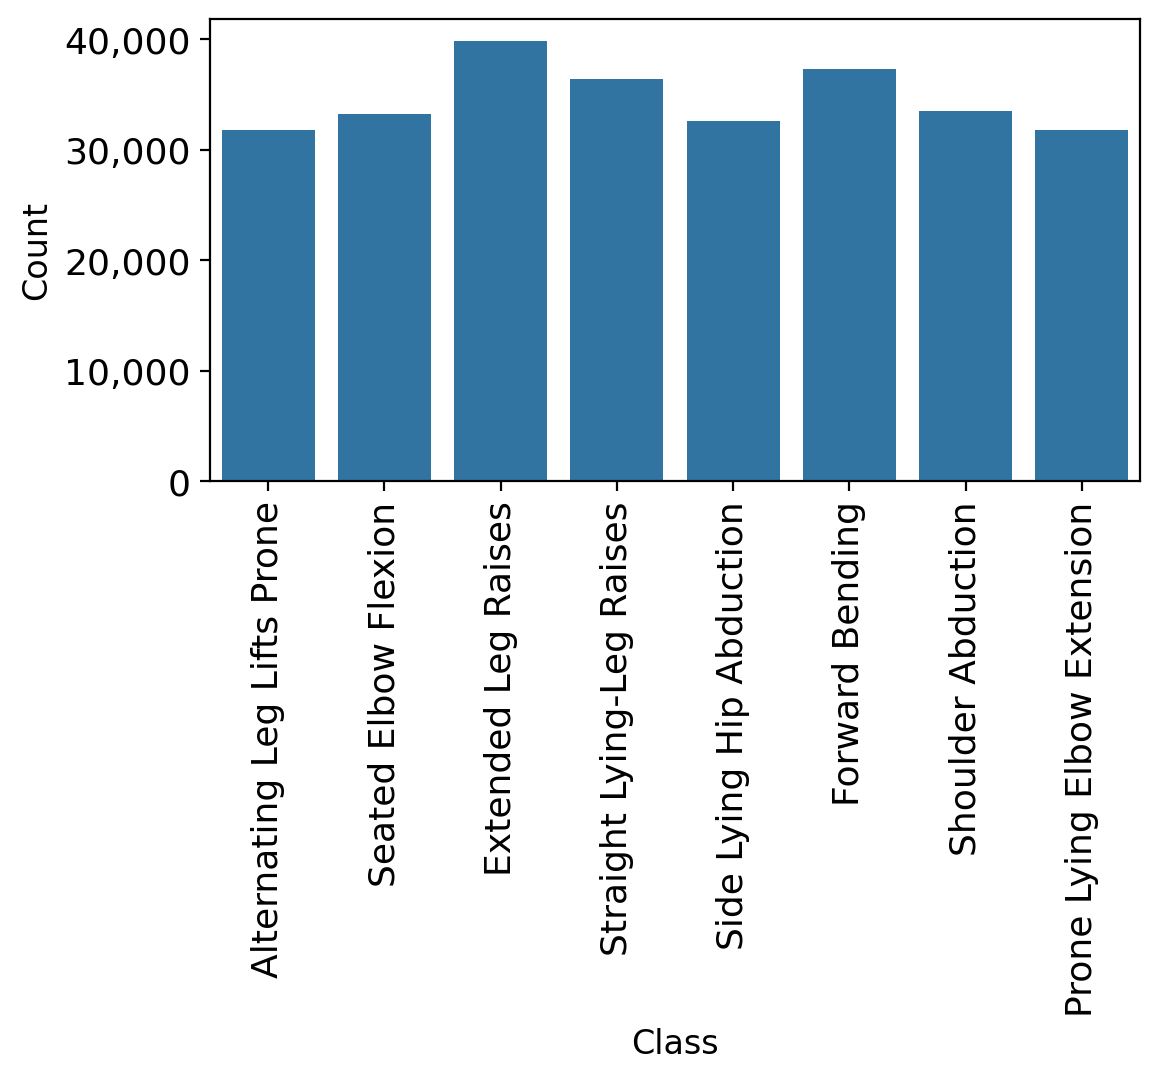

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as tkr
def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_format = tkr.FuncFormatter(func)  # make formatter
plt.figure(figsize=(6,3), dpi = 200)
p=sns.countplot(x='label',data= combined_df )
p.yaxis.set_major_formatter(y_format)
p.tick_params(labelsize=13)
plt.xticks(rotation = 90)
plt.xlabel("Class",fontsize=12)
plt.ylabel("Count",fontsize=12)
# plt.savefig('barchart.pdf',dpi=100,bbox_inches = 'tight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# combined_df['label']=le.fit_transform(combined_df['label'])

# Assuming 'combined_df' is the DataFrame you want to split
X = combined_df.drop('label', axis=1)  # Features
y = combined_df['label']  # Labels

# # Encode categorical labels
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", Y_train.shape)
print("y_test shape:", Y_test.shape)


X_train shape: (221300, 9)
X_test shape: (55325, 9)
y_train shape: (221300,)
y_test shape: (55325,)


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
# import matplotlib.ticker as tkr

# def func(x, pos):  # formatter function takes tick label and tick position
#     s = '%d' % x
#     groups = []
#     while s and s[-1].isdigit():
#         groups.append(s[-3:])
#         s = s[:-3]
#     return s + ','.join(reversed(groups))

# y_format = tkr.FuncFormatter(func)  # make formatter

# # Assuming 'combined_df' is the DataFrame containing your data
# X = combined_df.drop('label', axis=1)
# y = combined_df['label']

# # Apply SMOTE on the training set
# smote = SMOTE(random_state=0)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# # Visualize the class distribution after SMOTE
# plt.figure(figsize=(6,4), dpi=100)
# p = sns.countplot(x=y_train_smote)
# p.yaxis.set_major_formatter(y_format)
# p.tick_params(labelsize=13)
# plt.xlabel("Class", fontsize=12)
# plt.ylabel("Count", fontsize=12)
# plt.title("Class Distribution After SMOTE")
# plt.show()


# ML

In [ ]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
clf = RandomForestClassifier(n_estimators=10,max_depth=10, random_state=0,criterion='entropy')
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
cf_matrix=confusion_matrix(Y_test,dtP3)
kf = KFold(n_splits=10, shuffle=True)
clf=RandomForestClassifier(n_estimators=10,max_depth=10,  random_state=0,criterion='entropy')
score = cross_val_score(clf, X, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix

RF
Training time: 13.127925872802734s
accuracy score 0.9597107998192499
error rate: 0.04028920018075011
                             precision    recall  f1-score   support

Alternating Leg Lifts Prone       0.93      0.96      0.94      6273
        Extended Leg Raises       0.91      0.94      0.93      7951
Prone Lying Elbow Extension       1.00      1.00      1.00      6380
         Shoulder Abduction       0.98      0.91      0.94      6692
   Side Lying Hip Abduction       0.98      0.99      0.98      6484
  Straight Lying-Leg Raises       0.94      0.96      0.95      7386
           ⁠Forward Bending       0.99      0.93      0.96      7448
      ⁠Seated Elbow Flexion       0.96      0.99      0.98      6711

                   accuracy                           0.96     55325
                  macro avg       0.96      0.96      0.96     55325
               weighted avg       0.96      0.96      0.96     55325

0.9637 accuracy with a standard deviation of 0.0038


array([[6008,   24,    0,    4,   88,  134,   12,    3],
       [ 156, 7509,    0,   12,    0,  242,   31,    1],
       [  10,   14, 6349,    0,    2,    5,    0,    0],
       [   2,  354,    7, 6104,   45,    0,   16,  164],
       [   3,    1,    2,    5, 6421,   32,    7,   13],
       [ 218,   22,    0,    0,    0, 7119,    9,   18],
       [  11,  322,    0,   97,    0,    5, 6955,   58],
       [  36,    2,    0,   18,    9,    6,    9, 6631]])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=200,multi_class='auto',C=1.0)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
cf_matrix=confusion_matrix(Y_test,dtP3)
kf = KFold(n_splits=10, shuffle=True)
clf=LogisticRegression(random_state=0,max_iter=200,multi_class='auto',C=1.0)
score = cross_val_score(clf, X, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix

Training time: 15.10894513130188s
accuracy score 0.3192046995029372
error rate: 0.6807953004970628
                             precision    recall  f1-score   support

Alternating Leg Lifts Prone       0.16      0.12      0.14      6273
        Extended Leg Raises       0.39      0.60      0.47      7951
Prone Lying Elbow Extension       0.48      0.53      0.51      6380
         Shoulder Abduction       0.08      0.05      0.06      6692
   Side Lying Hip Abduction       0.04      0.02      0.03      6484
  Straight Lying-Leg Raises       0.29      0.33      0.31      7386
           ⁠Forward Bending       0.47      0.36      0.41      7448
      ⁠Seated Elbow Flexion       0.31      0.46      0.37      6711

                   accuracy                           0.32     55325
                  macro avg       0.28      0.31      0.29     55325
               weighted avg       0.28      0.32      0.29     55325

0.3189 accuracy with a standard deviation of 0.0025


array([[ 747, 1473, 1501,  236,  880, 1133,   94,  209],
       [ 239, 4788,    2,    1,  297,   17, 1072, 1535],
       [ 234,  803, 3409,  787,  214,   17,  233,  683],
       [ 130,  741,  458,  315,   12, 1076, 1545, 2415],
       [1336,  120, 1703,  426,  144, 1783,    0,  972],
       [ 967,  860,    0, 1526, 1339, 2464,   69,  161],
       [ 625, 1926,    0,    0,  161, 1148, 2715,  873],
       [ 291, 1514,    2,  545,  250,  989,   42, 3078]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
print("DT")
clf = DecisionTreeClassifier(random_state=0,max_depth=10)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
cf_matrix=confusion_matrix(Y_test,dtP3)
kf = KFold(n_splits=10, shuffle=True)
clf=DecisionTreeClassifier(random_state=0,max_depth=10)
score = cross_val_score(clf,X, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix

DT
Training time: 5.816060781478882s
accuracy score 0.8793673746046091
error rate: 0.12063262539539088
                             precision    recall  f1-score   support

Alternating Leg Lifts Prone       0.91      0.87      0.89      6273
        Extended Leg Raises       0.88      0.84      0.86      7951
Prone Lying Elbow Extension       0.99      0.93      0.96      6380
         Shoulder Abduction       0.94      0.77      0.85      6692
   Side Lying Hip Abduction       0.86      0.97      0.91      6484
  Straight Lying-Leg Raises       0.87      0.90      0.88      7386
           ⁠Forward Bending       0.85      0.83      0.84      7448
      ⁠Seated Elbow Flexion       0.77      0.95      0.85      6711

                   accuracy                           0.88     55325
                  macro avg       0.89      0.88      0.88     55325
               weighted avg       0.88      0.88      0.88     55325

0.8762 accuracy with a standard deviation of 0.0062


array([[5438,   61,   12,   17,   47,  343,   39,  316],
       [ 158, 6710,    0,  123,  138,  116,  561,  145],
       [  52,   16, 5942,    3,  258,    3,   92,   14],
       [  62,  332,   25, 5125,  184,    0,  356,  608],
       [   7,    0,    9,    5, 6265,   19,    6,  173],
       [ 112,   54,    3,    1,  344, 6631,   14,  227],
       [  56,  267,    0,  105,    1,  470, 6175,  374],
       [  63,  168,    2,   52,   40,   18,    3, 6365]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
print("GNB")
clf = GaussianNB()
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
cf_matrix=confusion_matrix(Y_test,dtP3)
kf = KFold(n_splits=10, shuffle=True)
clf=GaussianNB()
score = cross_val_score(clf, X, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix

GNB
Training time: 1.6194031238555908s
accuracy score 0.3950474469046543
error rate: 0.6049525530953457
                             precision    recall  f1-score   support

Alternating Leg Lifts Prone       0.39      0.23      0.29      6273
        Extended Leg Raises       0.41      0.25      0.31      7951
Prone Lying Elbow Extension       0.52      0.20      0.29      6380
         Shoulder Abduction       0.32      0.13      0.19      6692
   Side Lying Hip Abduction       0.46      0.60      0.52      6484
  Straight Lying-Leg Raises       0.52      0.49      0.50      7386
           ⁠Forward Bending       0.28      0.69      0.40      7448
      ⁠Seated Elbow Flexion       0.45      0.54      0.49      6711

                   accuracy                           0.40     55325
                  macro avg       0.42      0.39      0.37     55325
               weighted avg       0.42      0.40      0.38     55325

0.3931 accuracy with a standard deviation of 0.0036


array([[1461,  164,  547,   68, 1484, 1503,  903,  143],
       [ 220, 1981,  204,   20,    1,  236, 4712,  577],
       [ 488,  257, 1278,  362, 1934,  390, 1222,  449],
       [  97,  484,  179,  878,  620,  316, 2007, 2111],
       [ 581,  270,   22,  188, 3873,  169,  875,  506],
       [ 745,  462,  177,  630,  429, 3631, 1272,   40],
       [ 123,  705,   26,  210,   27,  576, 5115,  666],
       [   3,  532,    2,  349,  121,  178, 1887, 3639]])

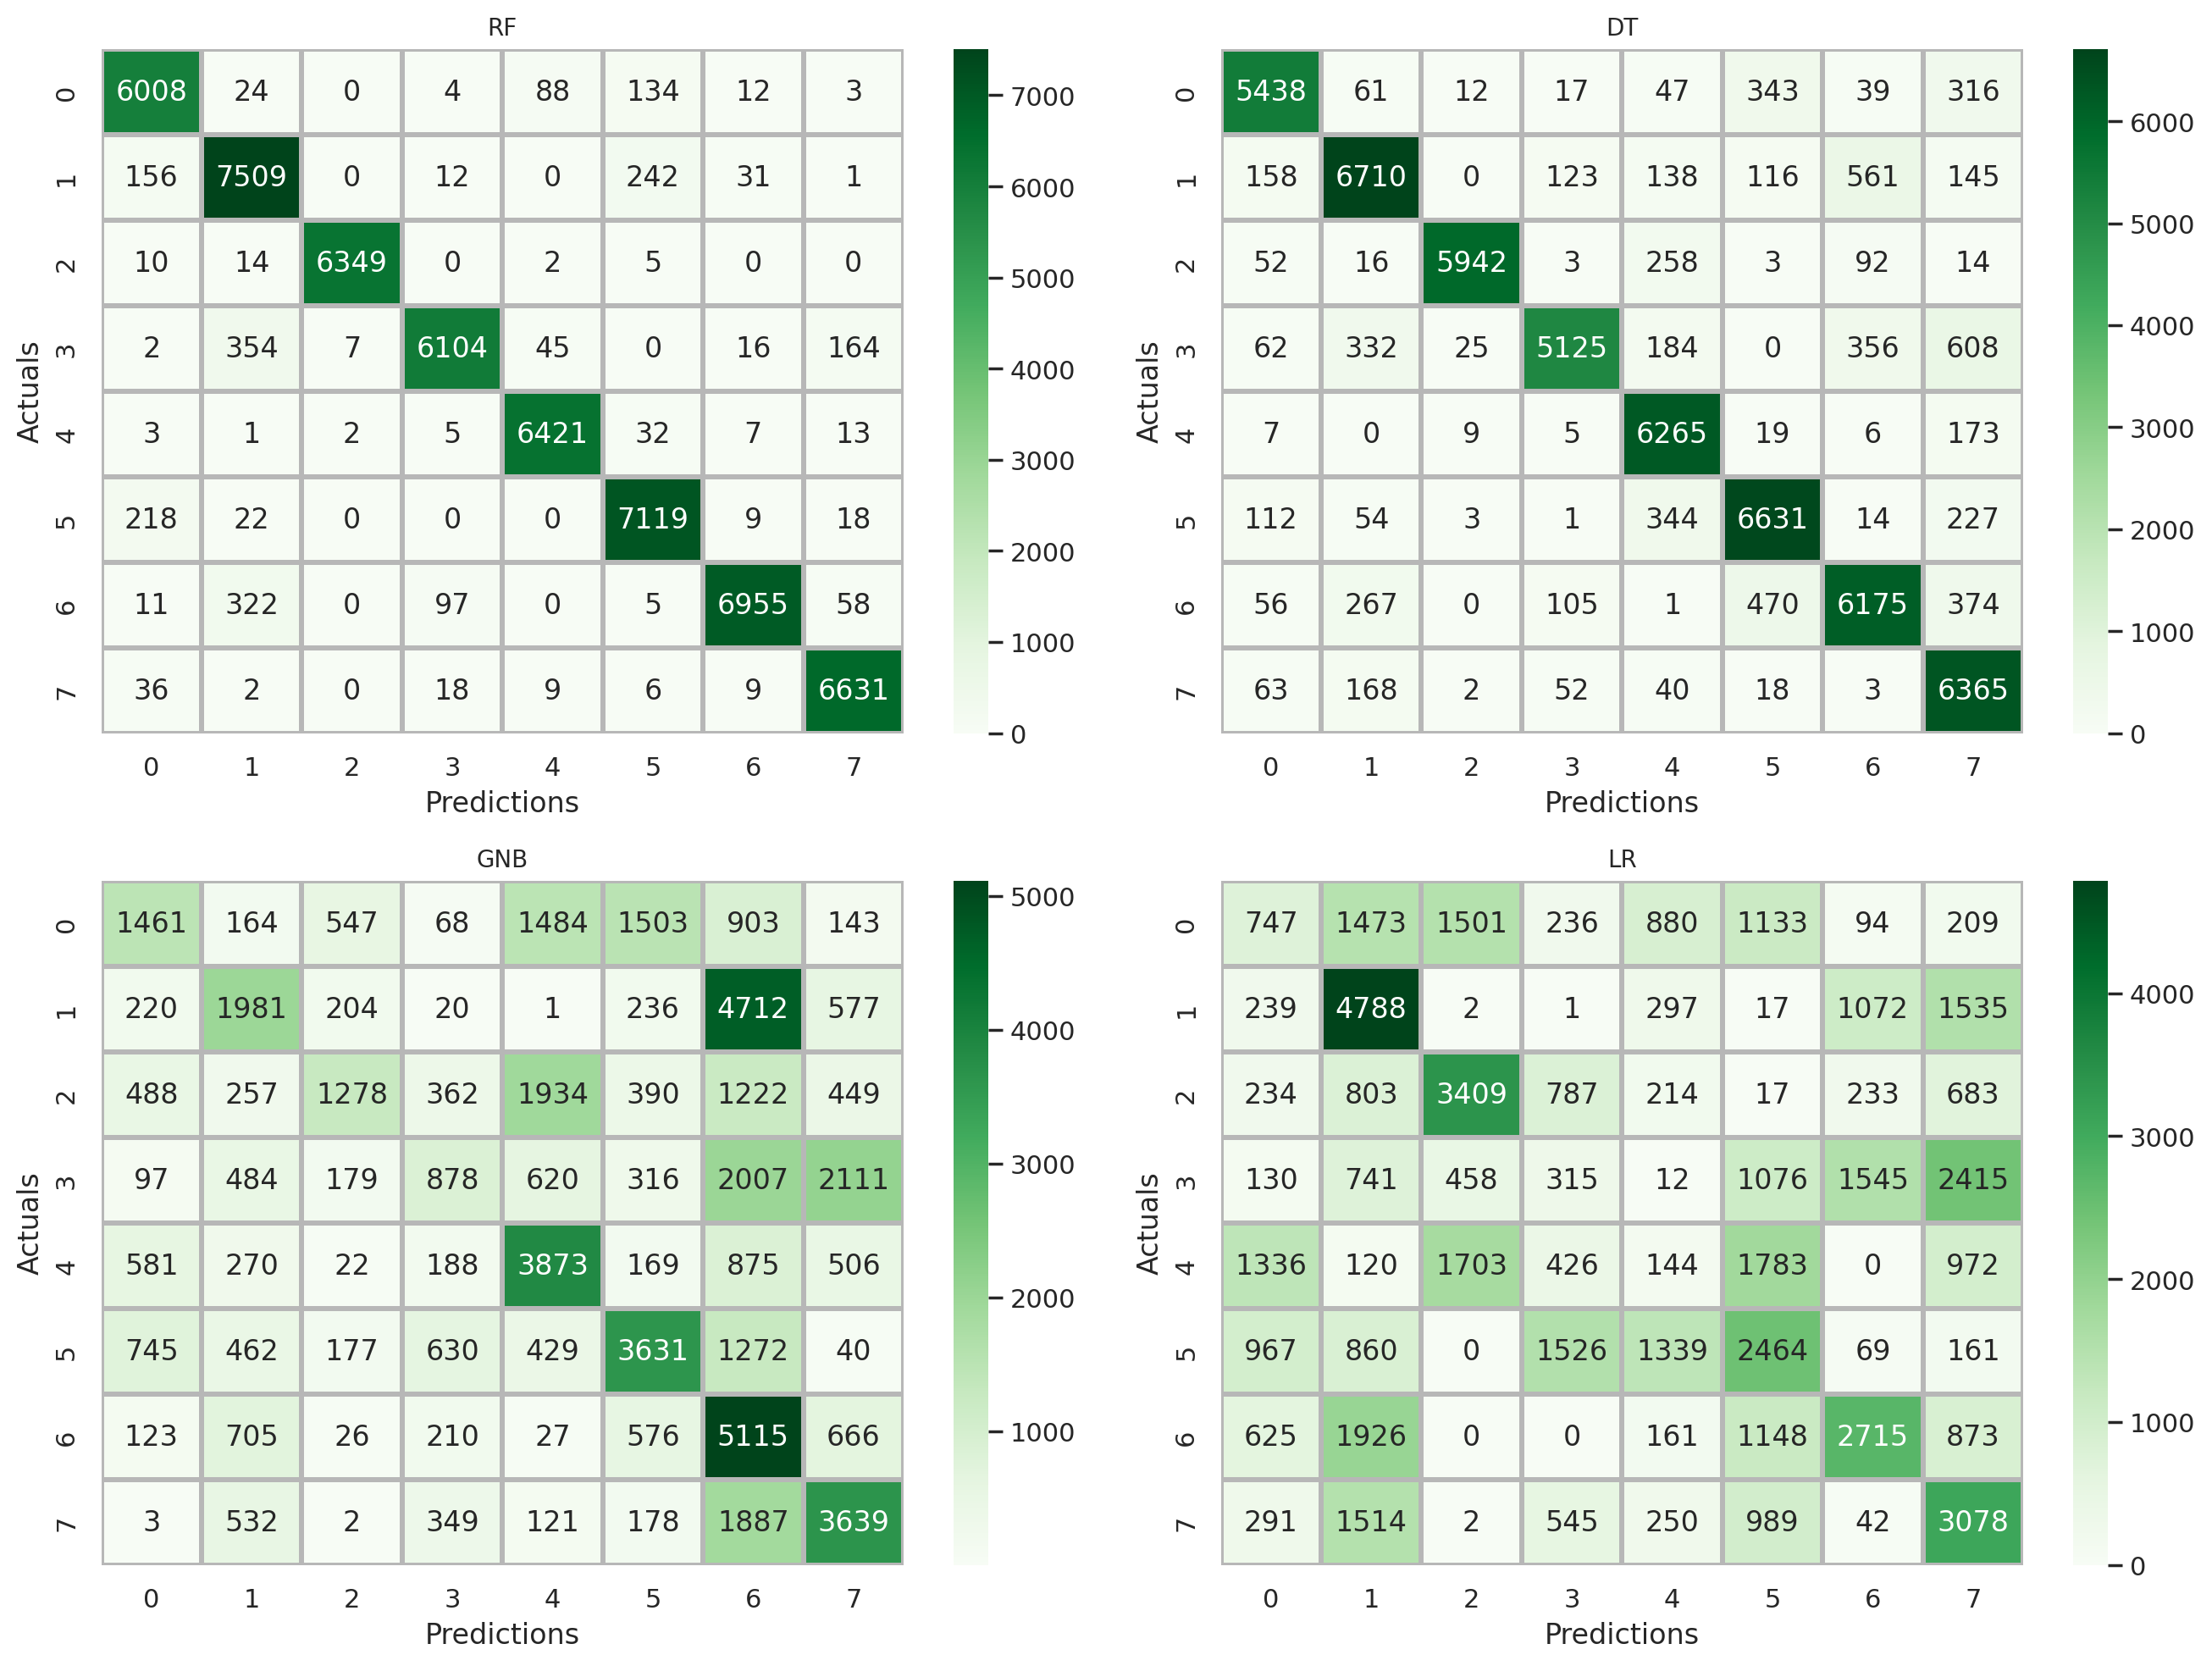

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

array2 = [[5438, 61, 12, 17, 47, 343, 39, 316],
          [158, 6710, 0, 123, 138, 116, 561, 145],
          [52, 16, 5942, 3, 258, 3, 92, 14],
          [62, 332, 25, 5125, 184, 0, 356, 608],
          [7, 0, 9, 5, 6265, 19, 6, 173],
          [112, 54, 3, 1, 344, 6631, 14, 227],
          [56, 267, 0, 105, 1, 470, 6175, 374],
          [63, 168, 2, 52, 40, 18, 3, 6365]]

array1 = [[6008, 24, 0, 4, 88, 134, 12, 3],
          [156, 7509, 0, 12, 0, 242, 31, 1],
          [10, 14, 6349, 0, 2, 5, 0, 0],
          [2, 354, 7, 6104, 45, 0, 16, 164],
          [3, 1, 2, 5, 6421, 32, 7, 13],
          [218, 22, 0, 0, 0, 7119, 9, 18],
          [11, 322, 0, 97, 0, 5, 6955, 58],
          [36, 2, 0, 18, 9, 6, 9, 6631]]

array3 = [[1461, 164, 547, 68, 1484, 1503, 903, 143],
          [220, 1981, 204, 20, 1, 236, 4712, 577],
          [488, 257, 1278, 362, 1934, 390, 1222, 449],
          [97, 484, 179, 878, 620, 316, 2007, 2111],
          [581, 270, 22, 188, 3873, 169, 875, 506],
          [745, 462, 177, 630, 429, 3631, 1272, 40],
          [123, 705, 26, 210, 27, 576, 5115, 666],
          [3, 532, 2, 349, 121, 178, 1887, 3639]]

array4 = [[747, 1473, 1501, 236, 880, 1133, 94, 209],
          [239, 4788, 2, 1, 297, 17, 1072, 1535],
          [234, 803, 3409, 787, 214, 17, 233, 683],
          [130, 741, 458, 315, 12, 1076, 1545, 2415],
          [1336, 120, 1703, 426, 144, 1783, 0, 972],
          [967, 860, 0, 1526, 1339, 2464, 69, 161],
          [625, 1926, 0, 0, 161, 1148, 2715, 873],
          [291, 1514, 2, 545, 250, 989, 42, 3078]]

def plot_sub_sentiment(Airline, A):
    sns.set()

    sns.heatmap(Airline, annot=True, fmt="d", linecolor="#B7B7B7", linewidths=2, cmap='Greens')

    plt.title(A, fontsize=10)
    plt.xlabel('Predictions')
    plt.ylabel('Actuals')

plt.figure(1, figsize=(20, 10), dpi=200)
plt.subplot(231)
plot_sub_sentiment(array1, 'RF')
plt.subplot(232)
plot_sub_sentiment(array2, 'DT')
plt.subplot(234)
plot_sub_sentiment(array3, 'GNB')
plt.subplot(235)
plot_sub_sentiment(array4, 'LR')
plt.tight_layout()
plt.show()


# DL

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
combined_df['label']=le.fit_transform(combined_df['label'])
# Assuming 'combined_df' is the DataFrame you want to split
X = combined_df.drop('label', axis=1)  # Features
y = combined_df['label']  # Labels

# # Encode categorical labels
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0,shuffle=True)



LSTM

In [ ]:
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, LSTM,GRU,Dropout,SimpleRNN
# Build the LSTM model
model = Sequential()
model.add(LSTM(16, input_shape= (X_train.shape[1], 1)))
# model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' ,metrics=['accuracy'])
print(model.summary())
start = time.time()
history=model.fit(X_train, to_categorical(Y_train, num_classes=8), validation_split=0.1, epochs=10)
stop = time.time()
print(f"Training time: {stop - start}s")


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 16)                1152      
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
Total params: 1288 (5.03 KB)
Trainable params: 1288 (5.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
6225/6225 [==============================] - 35s 5ms/step - loss: 1.3606 - accuracy: 0.4664 - val_loss: 0.9852 - val_accuracy: 0.6335
Epoch 2/10
6225/6225 [==============================] - 32s 5ms/step - loss: 0.9411 - accuracy: 0.6450 - val_loss: 0.7145 - val_accuracy

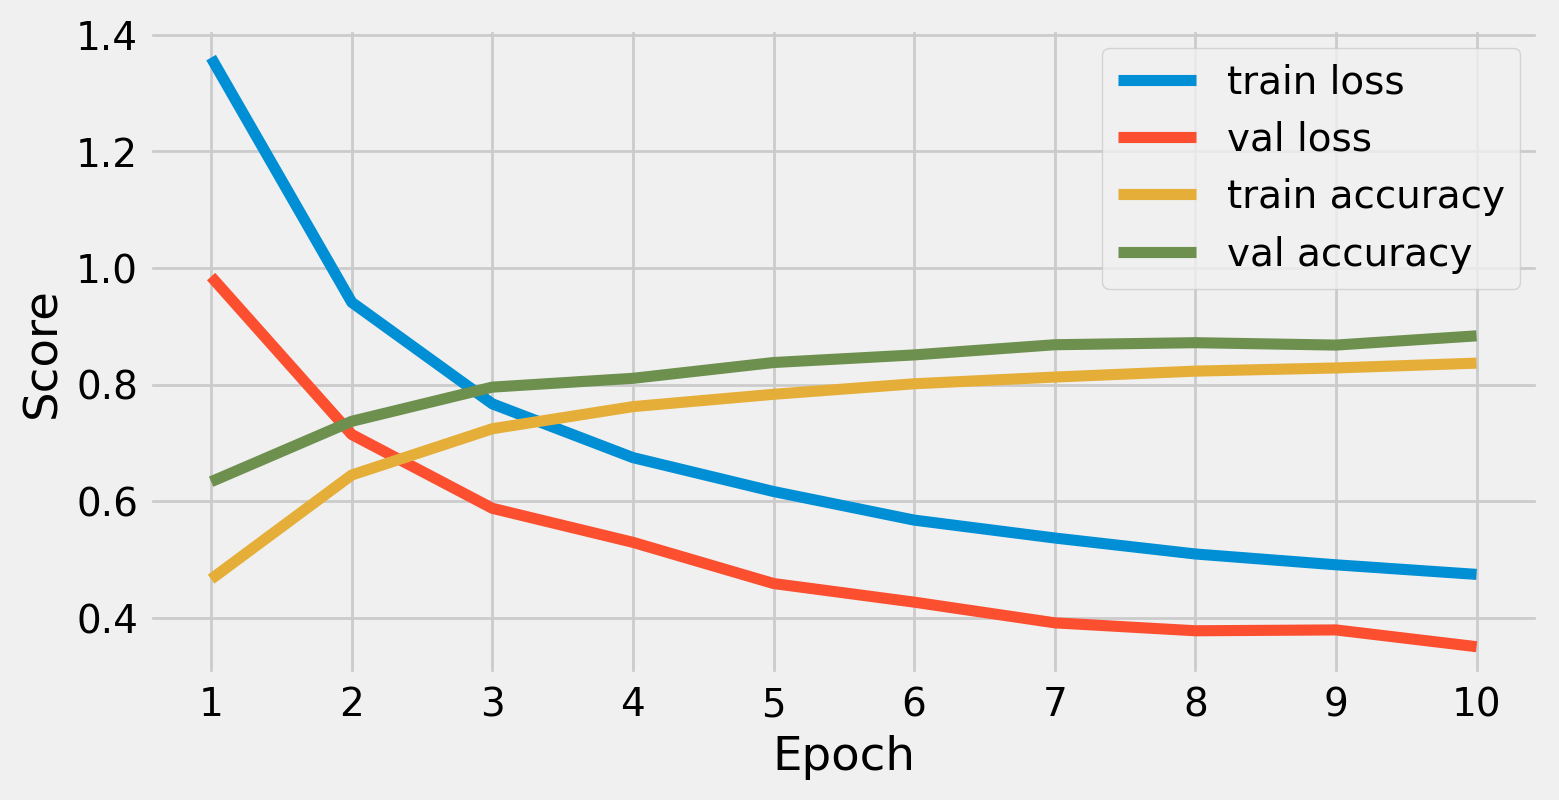

In [ ]:
import matplotlib.ticker as mticker

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8, 4), dpi = 200)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.grid(True)
plt.legend()

In [ ]:
scores = model.predict(X_test)
print('accuracy score',accuracy_score(Y_test,scores.argmax(axis=1)))
print('error rate:',1-accuracy_score(Y_test,scores.argmax(axis=1)))
print(classification_report(Y_test,scores.argmax(axis=1)))
confusion_matrix(Y_test,scores.argmax(axis=1))

1729/1729 [==============================] - 4s 2ms/step
accuracy score 0.883524627202892
error rate: 0.11647537279710796
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      6273
           1       0.84      0.89      0.86      7951
           2       0.94      0.88      0.91      6380
           3       0.88      0.78      0.82      6692
           4       0.93      0.93      0.93      6484
           5       0.86      0.92      0.89      7386
           6       0.90      0.90      0.90      7448
           7       0.89      0.94      0.91      6711

    accuracy                           0.88     55325
   macro avg       0.89      0.88      0.88     55325
weighted avg       0.88      0.88      0.88     55325



array([[5189,  102,   70,   17,  127,  595,   70,  103],
       [ 242, 7075,   19,   60,    3,  304,  188,   60],
       [ 220,   59, 5599,  219,  174,   42,   37,   30],
       [  35,  531,  102, 5203,  124,   64,  282,  351],
       [  42,   18,  152,   74, 6036,   25,   17,  120],
       [ 230,  183,    1,   84,   20, 6764,   90,   14],
       [  37,  450,    3,  125,    1,   24, 6721,   87],
       [  67,   45,    8,  161,   18,   16,  102, 6294]])

CNN

In [ ]:
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, LSTM,Embedding, Dropout,GRU,SimpleRNN,Conv1D,MaxPool1D,Flatten
from keras.layers import Dense, LSTM,GRU,Dropout,SimpleRNN
# Build the LSTM model
model = Sequential()
model.add(Conv1D(8, 3, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
model.add(MaxPool1D(pool_size=(4)))
model.add(Flatten())
# model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' ,metrics=['accuracy'])
print(model.summary())
start = time.time()
history=model.fit(X_train, to_categorical(Y_train, num_classes=8), validation_split=0.1, epochs=10)
stop = time.time()
print(f"Training time: {stop - start}s")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 9, 8)              32        
                                                                 
 max_pooling1d (MaxPooling1  (None, 2, 8)              0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
Total params: 168 (672.00 Byte)
Trainable params: 168 (672.00 Byte)
Non-trainable params: 0 (0.00 Byte)
________________

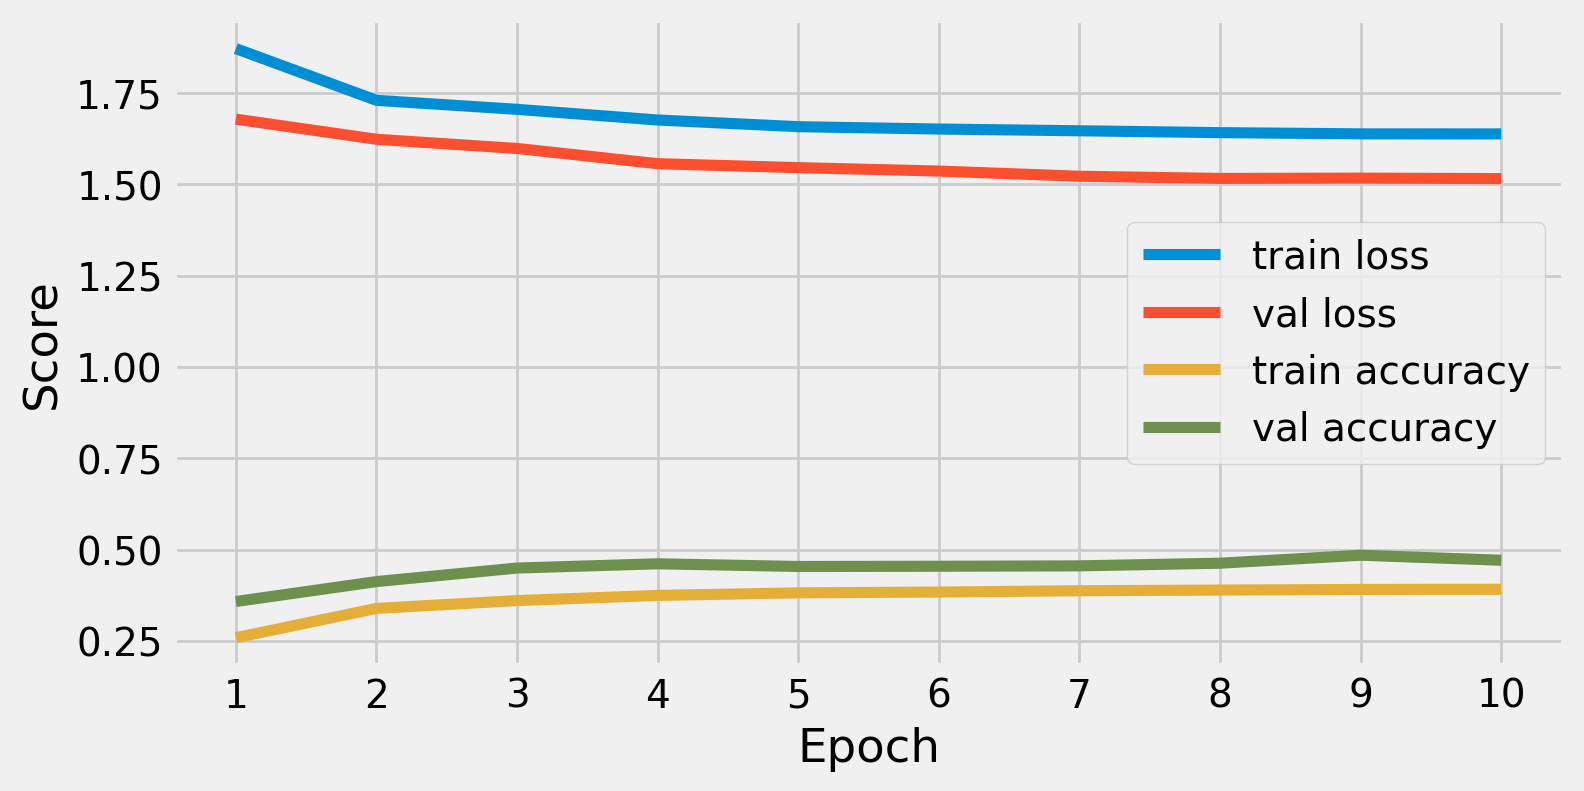

In [ ]:
import matplotlib.ticker as mticker

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8, 4), dpi = 200)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xticks(np.arange(10), np.arange(1, 10+1))
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.grid(True)
plt.legend()

In [ ]:
scores = model.predict(X_test)
print('accuracy score',accuracy_score(Y_test,scores.argmax(axis=1)))
print('error rate:',1-accuracy_score(Y_test,scores.argmax(axis=1)))
print(classification_report(Y_test,scores.argmax(axis=1)))
confusion_matrix(Y_test,scores.argmax(axis=1))

1729/1729 [==============================] - 3s 2ms/step
accuracy score 0.47023949389968367
error rate: 0.5297605061003163
              precision    recall  f1-score   support

           0       0.55      0.50      0.52      6273
           1       0.40      0.49      0.44      7951
           2       0.62      0.32      0.42      6380
           3       0.41      0.12      0.19      6692
           4       0.50      0.67      0.57      6484
           5       0.49      0.62      0.55      7386
           6       0.43      0.47      0.45      7448
           7       0.44      0.55      0.49      6711

    accuracy                           0.47     55325
   macro avg       0.48      0.47      0.45     55325
weighted avg       0.48      0.47      0.45     55325



array([[3167,  207,  485,   41,  316, 1661,  168,  228],
       [ 195, 3889,   28,   67,    7, 1029, 1884,  852],
       [ 962,  766, 2040,  206,  994,  867,  543,    2],
       [   1,  806,   30,  831,  648,  253, 1720, 2403],
       [ 246,  501,  197,  178, 4320,  338,  254,  450],
       [ 450,  376,  446,   66, 1346, 4611,   35,   56],
       [ 559, 1774,   15,    1,  569,  412, 3473,  645],
       [ 220, 1515,   53,  617,  446,  157,   18, 3685]])

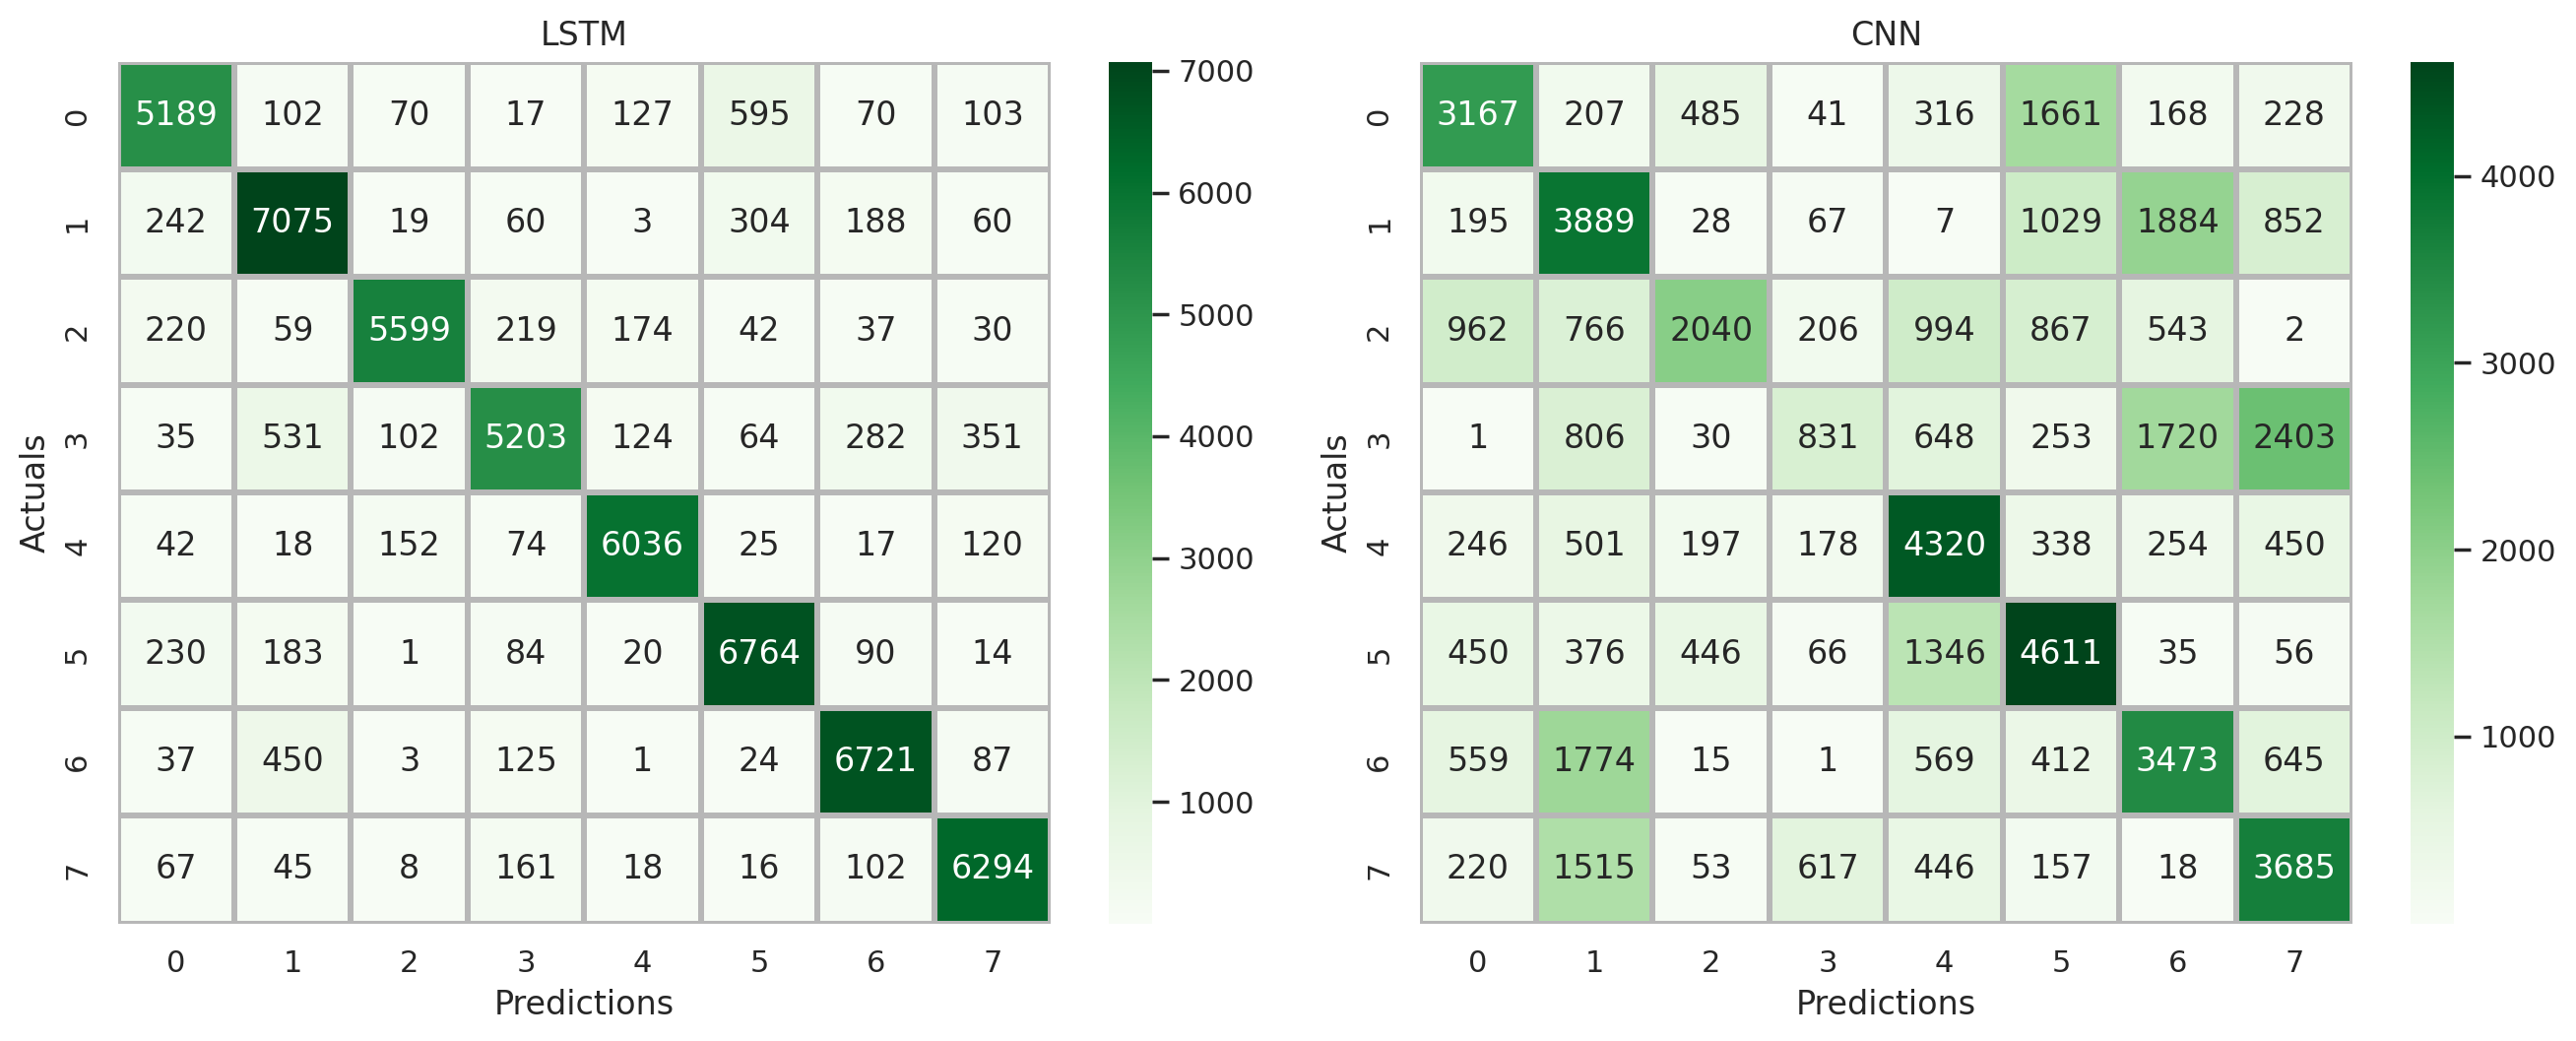

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

array2 = [[3167,  207,  485,   41,  316, 1661,  168,  228],
       [ 195, 3889,   28,   67,    7, 1029, 1884,  852],
       [ 962,  766, 2040,  206,  994,  867,  543,    2],
       [   1,  806,   30,  831,  648,  253, 1720, 2403],
       [ 246,  501,  197,  178, 4320,  338,  254,  450],
       [ 450,  376,  446,   66, 1346, 4611,   35,   56],
       [ 559, 1774,   15,    1,  569,  412, 3473,  645],
       [ 220, 1515,   53,  617,  446,  157,   18, 3685]]

array1 = [[5189,  102,   70,   17,  127,  595,   70,  103],
       [ 242, 7075,   19,   60,    3,  304,  188,   60],
       [ 220,   59, 5599,  219,  174,   42,   37,   30],
       [  35,  531,  102, 5203,  124,   64,  282,  351],
       [  42,   18,  152,   74, 6036,   25,   17,  120],
       [ 230,  183,    1,   84,   20, 6764,   90,   14],
       [  37,  450,    3,  125,    1,   24, 6721,   87],
       [  67,   45,    8,  161,   18,   16,  102, 6294]]



def plot_sub_sentiment(Airline, A):
    sns.set()

    sns.heatmap(Airline, annot=True, fmt="d", linecolor="#B7B7B7", linewidths=2, cmap='Greens')

    plt.title(A, fontsize=12)
    plt.xlabel('Predictions')
    plt.ylabel('Actuals')

plt.figure(1, figsize=(20, 10), dpi=200)
plt.subplot(231)
plot_sub_sentiment(array1, 'LSTM')
plt.subplot(232)
plot_sub_sentiment(array2, 'CNN')

plt.tight_layout()
plt.show()


# Novel appoprach

In [ ]:
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, LSTM,GRU,Dropout,SimpleRNN
# Build the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape= (X_train.shape[1], 1)))
# model.add(Dense(16,activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(8,activation='softmax'))

features_train = model.predict(X)
df1=pd.DataFrame(features_train)

8645/8645 [==============================] - 25s 3ms/step


In [ ]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
dt= RandomForestClassifier(n_estimators=10,max_depth=10, random_state=0,criterion='entropy')
dtPre1=dt.fit(X, y).predict_proba(X)

RF


In [ ]:
dt=pd.DataFrame(dtPre1)
LSTM=pd.DataFrame(df1)
result = pd.concat([dt,LSTM], axis=1).reindex(dt.index)
result

0    1         2         3         4    5    6    7         0  \
0       0.958042  0.0  0.038843  0.000476  0.002639  0.0  0.0  0.0  0.124441   
1       0.958042  0.0  0.038843  0.000476  0.002639  0.0  0.0  0.0  0.124481   
2       0.958042  0.0  0.038843  0.000476  0.002639  0.0  0.0  0.0  0.124456   
3       0.958042  0.0  0.038843  0.000476  0.002639  0.0  0.0  0.0  0.124464   
4       0.958042  0.0  0.038843  0.000476  0.002639  0.0  0.0  0.0  0.124460   
...          ...  ...       ...       ...       ...  ...  ...  ...       ...   
276620  0.000000  0.0  0.999292  0.000021  0.000686  0.0  0.0  0.0  0.123642   
276621  0.000000  0.0  0.999292  0.000021  0.000686  0.0  0.0  0.0  0.123635   
276622  0.000000  0.0  0.999292  0.000021  0.000686  0.0  0.0  0.0  0.123628   
276623  0.000000  0.0  0.999292  0.000021  0.000686  0.0  0.0  0.0  0.123659   
276624  0.000000  0.0  0.999292  0.000021  0.000686  0.0  0.0  0.0  0.123637   

               1         2         3         4         5         6         7  
0       0.133587  0.133887  0.121359  0.121650  0.119786  0.126234  0.119055  
1       0.133562  0.133899  0.121342  0.121696  0.119705  0.126157  0.119159  
2       0.133601  0.133898  0.121360  0.121644  0.119773  0.126219  0.119050  
3       0.133545  0.133879  0.121345  0.121691  0.119742  0.126186  0.119148  
4       0.133570  0.133893  0.121353  0.121685  0.119734  0.126183  0.119121  
...          ...       ...       ...       ...       ...       ...       ...  
276620  0.132988  0.133375  0.120373  0.122191  0.119836  0.127438  0.120156  
276621  0.132977  0.133324  0.120391  0.122152  0.119922  0.127497  0.120101  
276622  0.132979  0.133317  0.120397  0.122145  0.119942  0.127510  0.120083  
276623  0.132966  0.133348  0.120376  0.122190  0.119849  0.127434  0.120179  
276624  0.133000  0.133358  0.120386  0.122158  0.119886  0.127473  0.120101  

[276625 rows x 16 columns]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(result,y, test_size = 0.2, random_state =0,shuffle=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
print("RF")
clf = RandomForestClassifier(n_estimators=10,max_depth=10, random_state=0,criterion='entropy')
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
cf_matrix=confusion_matrix(Y_test,dtP3)
kf = KFold(n_splits=10, shuffle=True)
clf=RandomForestClassifier(n_estimators=10,max_depth=10,  random_state=0,criterion='entropy')
score = cross_val_score(clf, result, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix

RF
Training time: 6.879382133483887s
accuracy score 0.9911974694984185
error rate: 0.00880253050158153
                             precision    recall  f1-score   support

Alternating Leg Lifts Prone       0.98      0.98      0.98      6273
        Extended Leg Raises       0.99      0.99      0.99      7951
Prone Lying Elbow Extension       1.00      1.00      1.00      6380
         Shoulder Abduction       0.99      0.99      0.99      6692
   Side Lying Hip Abduction       0.99      1.00      0.99      6484
  Straight Lying-Leg Raises       0.99      0.99      0.99      7386
           ⁠Forward Bending       1.00      0.99      0.99      7448
      ⁠Seated Elbow Flexion       1.00      1.00      1.00      6711

                   accuracy                           0.99     55325
                  macro avg       0.99      0.99      0.99     55325
               weighted avg       0.99      0.99      0.99     55325

0.9919 accuracy with a standard deviation of 0.0005


array([[6125,   21,    0,    1,   47,   75,    1,    3],
       [  11, 7889,    0,   13,    0,   21,   16,    1],
       [   3,    5, 6368,    1,    2,    1,    0,    0],
       [   0,   28,    0, 6638,    9,    0,   10,    7],
       [   7,    0,    1,    3, 6459,    7,    1,    6],
       [  74,   26,    0,    0,    3, 7277,    3,    3],
       [   3,   30,    0,   16,    0,    2, 7394,    3],
       [   9,    0,    1,    5,    6,    0,    2, 6688]])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=200,multi_class='auto',C=1.0)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
cf_matrix=confusion_matrix(Y_test,dtP3)
kf = KFold(n_splits=10, shuffle=True)
clf=LogisticRegression(random_state=0,max_iter=200,multi_class='auto',C=1.0)
score = cross_val_score(clf, result, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix

Training time: 17.325489044189453s
accuracy score 0.975183009489381
error rate: 0.02481699051061903
                             precision    recall  f1-score   support

Alternating Leg Lifts Prone       0.97      0.97      0.97      6273
        Extended Leg Raises       0.96      0.97      0.97      7951
Prone Lying Elbow Extension       1.00      1.00      1.00      6380
         Shoulder Abduction       0.96      0.96      0.96      6692
   Side Lying Hip Abduction       0.99      0.99      0.99      6484
  Straight Lying-Leg Raises       0.97      0.97      0.97      7386
           ⁠Forward Bending       0.97      0.95      0.96      7448
      ⁠Seated Elbow Flexion       0.99      0.99      0.99      6711

                   accuracy                           0.98     55325
                  macro avg       0.98      0.98      0.98     55325
               weighted avg       0.98      0.98      0.98     55325

0.9758 accuracy with a standard deviation of 0.0007


array([[6069,   18,    3,    1,   45,  123,    9,    5],
       [  24, 7701,    0,   47,    0,  106,   71,    2],
       [  13,    5, 6357,    0,    1,    4,    0,    0],
       [   2,  107,    0, 6436,   28,    0,   94,   25],
       [  15,    0,    1,    7, 6428,   19,    5,    9],
       [ 114,   50,    2,    2,    5, 7198,   11,    4],
       [   4,  118,    0,  177,    0,    6, 7110,   33],
       [  16,    1,    1,   21,    2,    3,   14, 6653]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
print("DT")
clf = DecisionTreeClassifier(random_state=0,max_depth=10)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
cf_matrix=confusion_matrix(Y_test,dtP3)
kf = KFold(n_splits=10, shuffle=True)
clf=DecisionTreeClassifier(random_state=0,max_depth=10)
score = cross_val_score(clf,result, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix

DT
Training time: 3.063297748565674s
accuracy score 0.986967916854948
error rate: 0.013032083145051998
                             precision    recall  f1-score   support

Alternating Leg Lifts Prone       0.97      0.98      0.97      6273
        Extended Leg Raises       0.99      0.99      0.99      7951
Prone Lying Elbow Extension       1.00      1.00      1.00      6380
         Shoulder Abduction       0.98      0.99      0.99      6692
   Side Lying Hip Abduction       0.99      0.99      0.99      6484
  Straight Lying-Leg Raises       0.98      0.98      0.98      7386
           ⁠Forward Bending       0.99      0.99      0.99      7448
      ⁠Seated Elbow Flexion       0.99      0.99      0.99      6711

                   accuracy                           0.99     55325
                  macro avg       0.99      0.99      0.99     55325
               weighted avg       0.99      0.99      0.99     55325

0.9880 accuracy with a standard deviation of 0.0006


array([[6151,   19,    4,    7,   30,   54,    0,    8],
       [  13, 7839,    1,   25,    3,   45,   24,    1],
       [  13,    6, 6355,    0,    3,    3,    0,    0],
       [   0,   38,    0, 6619,    8,   12,    9,    6],
       [  45,    0,    1,    7, 6394,   23,    1,   13],
       [  94,   22,   13,    2,    2, 7247,    3,    3],
       [   6,   13,    0,   55,    0,    6, 7364,    4],
       [  37,    0,    1,   20,    9,    7,    2, 6635]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
print("GNB")
clf = GaussianNB()
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
cf_matrix=confusion_matrix(Y_test,dtP3)
kf = KFold(n_splits=10, shuffle=True)
clf=GaussianNB()
score = cross_val_score(clf, result, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix

GNB
Training time: 0.34740686416625977s
accuracy score 0.960921825576141
error rate: 0.03907817442385897
                             precision    recall  f1-score   support

Alternating Leg Lifts Prone       0.94      0.96      0.95      6273
        Extended Leg Raises       0.95      0.94      0.94      7951
Prone Lying Elbow Extension       1.00      0.99      0.99      6380
         Shoulder Abduction       0.93      0.95      0.94      6692
   Side Lying Hip Abduction       0.99      0.98      0.98      6484
  Straight Lying-Leg Raises       0.94      0.96      0.95      7386
           ⁠Forward Bending       0.97      0.94      0.95      7448
      ⁠Seated Elbow Flexion       0.98      0.98      0.98      6711

                   accuracy                           0.96     55325
                  macro avg       0.96      0.96      0.96     55325
               weighted avg       0.96      0.96      0.96     55325

0.9616 accuracy with a standard deviation of 0.0009


array([[6027,   27,    0,    3,   51,  151,    1,   13],
       [  35, 7455,    0,   83,    0,  299,   79,    0],
       [  39,    3, 6313,   25,    0,    0,    0,    0],
       [   0,  170,    0, 6348,   34,    0,   80,   60],
       [  53,    0,    0,   29, 6379,   15,    1,    7],
       [ 232,   19,    0,    0,    3, 7114,   15,    3],
       [   0,  164,    0,  256,    0,    4, 6976,   48],
       [  22,    0,    0,  109,    2,    6,   21, 6551]])

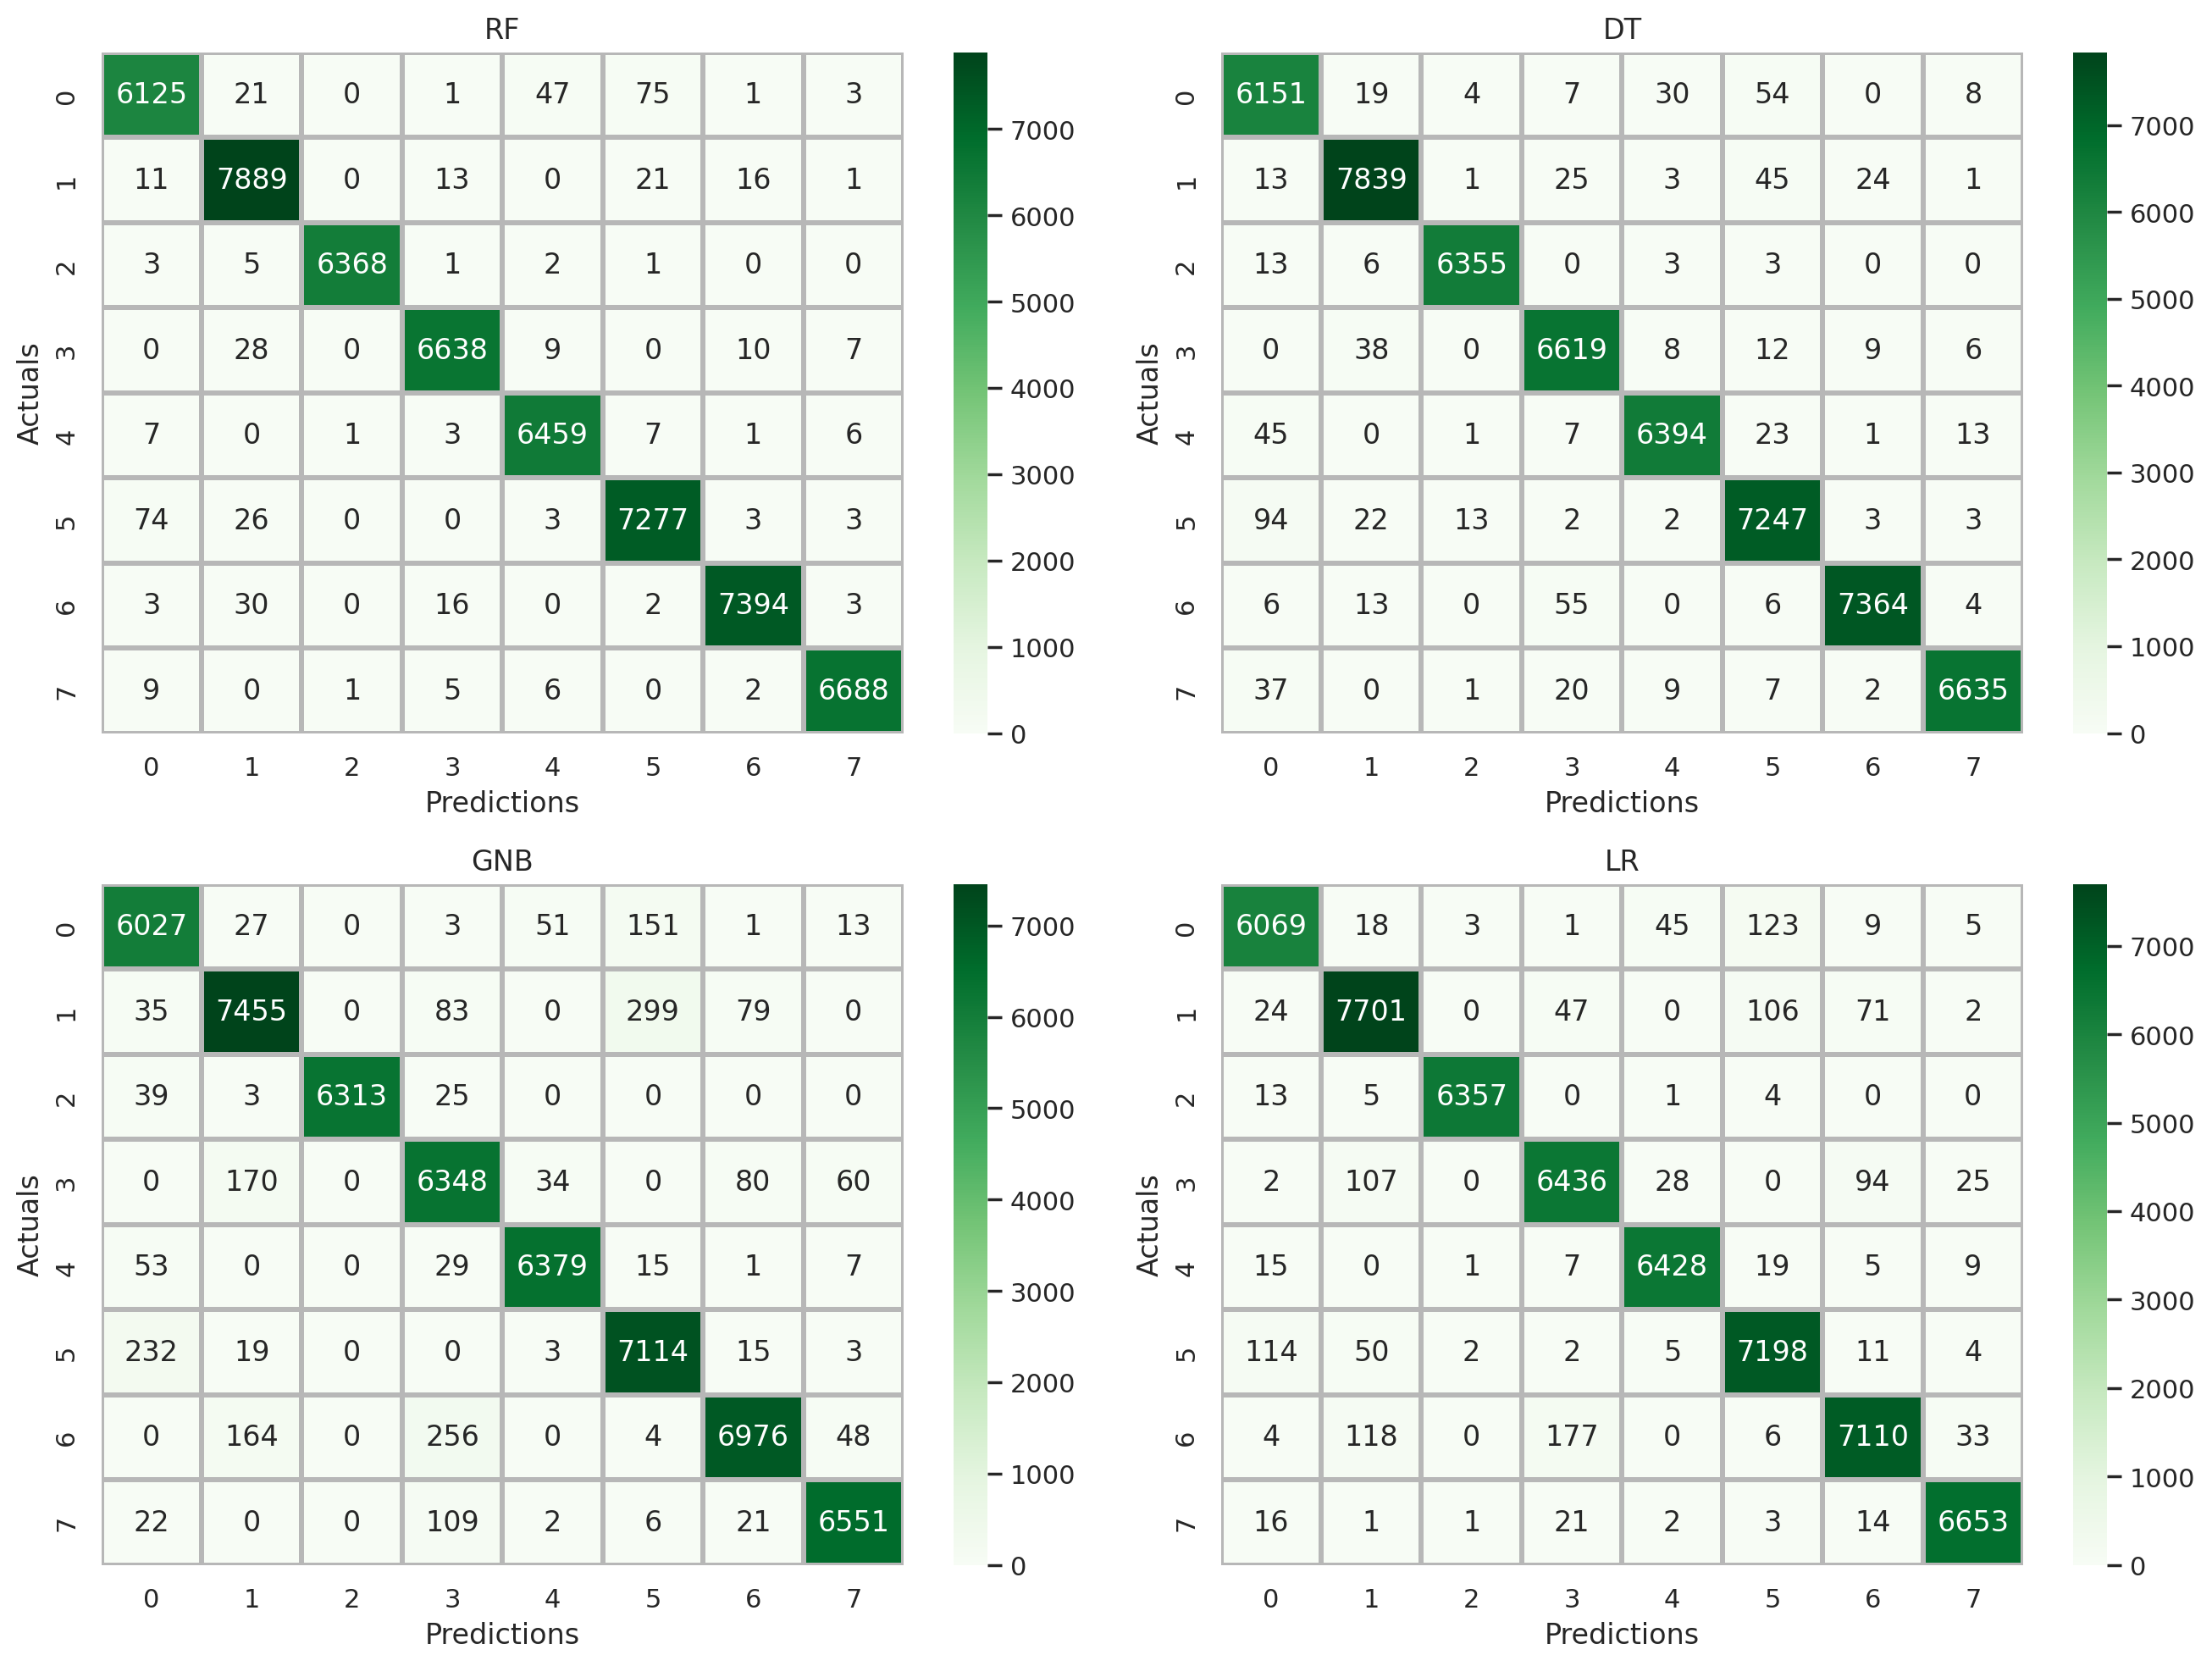

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

array2 = [[6151,   19,    4,    7,   30,   54,    0,    8],
       [  13, 7839,    1,   25,    3,   45,   24,    1],
       [  13,    6, 6355,    0,    3,    3,    0,    0],
       [   0,   38,    0, 6619,    8,   12,    9,    6],
       [  45,    0,    1,    7, 6394,   23,    1,   13],
       [  94,   22,   13,    2,    2, 7247,    3,    3],
       [   6,   13,    0,   55,    0,    6, 7364,    4],
       [  37,    0,    1,   20,    9,    7,    2, 6635]]

array1 = [[6125,   21,    0,    1,   47,   75,    1,    3],
       [  11, 7889,    0,   13,    0,   21,   16,    1],
       [   3,    5, 6368,    1,    2,    1,    0,    0],
       [   0,   28,    0, 6638,    9,    0,   10,    7],
       [   7,    0,    1,    3, 6459,    7,    1,    6],
       [  74,   26,    0,    0,    3, 7277,    3,    3],
       [   3,   30,    0,   16,    0,    2, 7394,    3],
       [   9,    0,    1,    5,    6,    0,    2, 6688]]

array3 = [[6027,   27,    0,    3,   51,  151,    1,   13],
       [  35, 7455,    0,   83,    0,  299,   79,    0],
       [  39,    3, 6313,   25,    0,    0,    0,    0],
       [   0,  170,    0, 6348,   34,    0,   80,   60],
       [  53,    0,    0,   29, 6379,   15,    1,    7],
       [ 232,   19,    0,    0,    3, 7114,   15,    3],
       [   0,  164,    0,  256,    0,    4, 6976,   48],
       [  22,    0,    0,  109,    2,    6,   21, 6551]]

array4 = [[6069,   18,    3,    1,   45,  123,    9,    5],
       [  24, 7701,    0,   47,    0,  106,   71,    2],
       [  13,    5, 6357,    0,    1,    4,    0,    0],
       [   2,  107,    0, 6436,   28,    0,   94,   25],
       [  15,    0,    1,    7, 6428,   19,    5,    9],
       [ 114,   50,    2,    2,    5, 7198,   11,    4],
       [   4,  118,    0,  177,    0,    6, 7110,   33],
       [  16,    1,    1,   21,    2,    3,   14, 6653]]

def plot_sub_sentiment(Airline, A):
    sns.set()

    sns.heatmap(Airline, annot=True, fmt="d", linecolor="#B7B7B7", linewidths=2, cmap='Greens')

    plt.title(A, fontsize=12)
    plt.xlabel('Predictions')
    plt.ylabel('Actuals')

plt.figure(1, figsize=(20, 10), dpi=200)
plt.subplot(231)
plot_sub_sentiment(array1, 'RF')
plt.subplot(232)
plot_sub_sentiment(array2, 'DT')
plt.subplot(234)
plot_sub_sentiment(array3, 'GNB')
plt.subplot(235)
plot_sub_sentiment(array4, 'LR')
plt.tight_layout()
plt.show()


In [21]:
# Encode categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

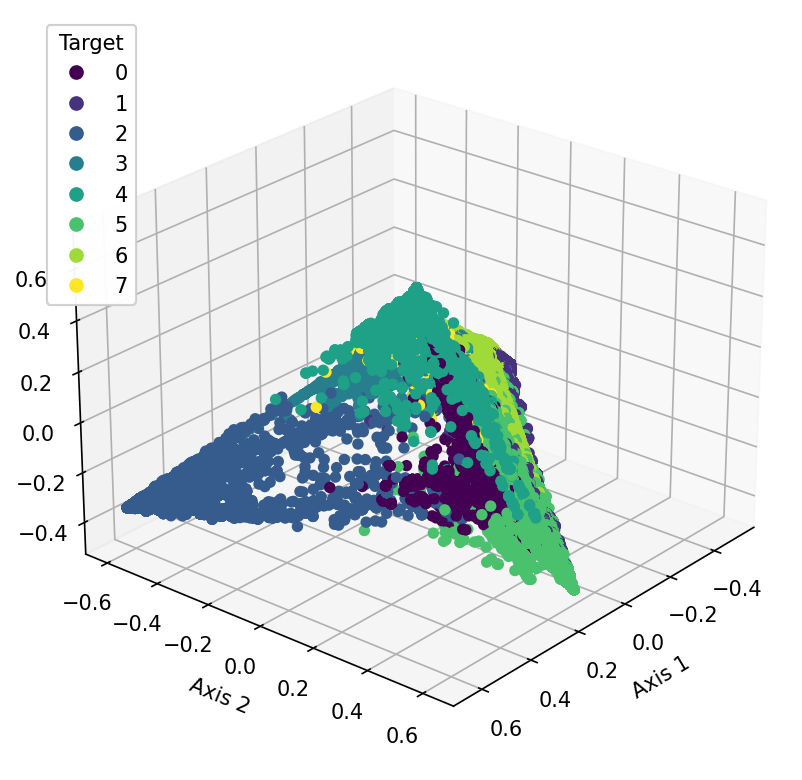

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(result)

import matplotlib.pyplot as plt
df2=pd.DataFrame(X_train_pca,columns=['Axis 1','Axis 2','Axis 3'])
threedee = plt.figure(figsize=(10, 6.5), dpi=150).add_subplot(projection='3d')
import numpy as np
colors = np.random.rand(276625)
scatter= threedee.scatter(df2['Axis 1'], df2['Axis 2'], df2['Axis 3'],c=y_encoded, alpha=1.0, marker=r'o')
threedee.set_xlabel('Axis 1')
threedee.set_ylabel('Axis 2')
threedee.set_zlabel('Axis 3')
legend1 = threedee.legend(*scatter.legend_elements(),
                    loc="upper left", title="Target")
threedee.add_artist(legend1)
threedee.view_init(azim=40, elev=25)
# threedee.grid(True)
# plt.savefig('pca_gen_data.pdf')

plt.show()

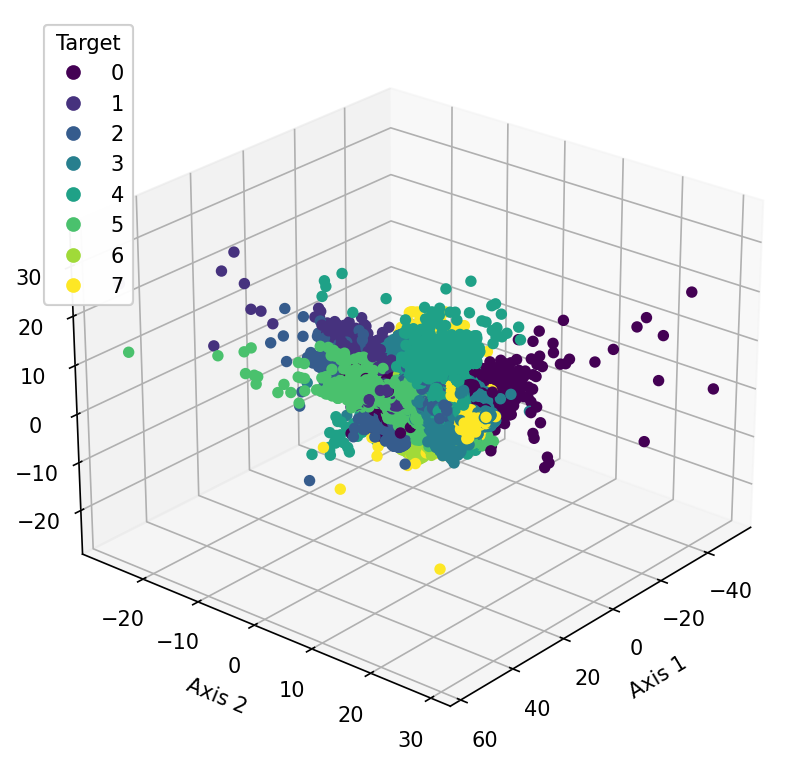

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X)

import matplotlib.pyplot as plt
df2=pd.DataFrame(X_train_pca,columns=['Axis 1','Axis 2','Axis 3'])
threedee = plt.figure(figsize=(10, 6.5), dpi=150).add_subplot(projection='3d')
import numpy as np
colors = np.random.rand(276625)
scatter= threedee.scatter(df2['Axis 1'], df2['Axis 2'], df2['Axis 3'],c=y_encoded, alpha=1.0, marker=r'o')
threedee.set_xlabel('Axis 1')
threedee.set_ylabel('Axis 2')
threedee.set_zlabel('Axis 3')
legend1 = threedee.legend(*scatter.legend_elements(),
                    loc="upper left", title="Target")
threedee.add_artist(legend1)
threedee.view_init(azim=40, elev=25)
# threedee.grid(True)
# plt.savefig('pca_gen_data.pdf')

plt.show()